
=== TEST RUN ===
Running ETL (numpy/pandas)...

Sample Data:
+---------------------+---------+
| date                |   value |
|---------------------+---------|
| 2024-01-01 00:00:00 |      97 |
| 2024-01-02 00:00:00 |      59 |
| 2024-01-03 00:00:00 |      57 |
| 2024-01-04 00:00:00 |      93 |
| 2024-01-05 00:00:00 |      51 |
+---------------------+---------+


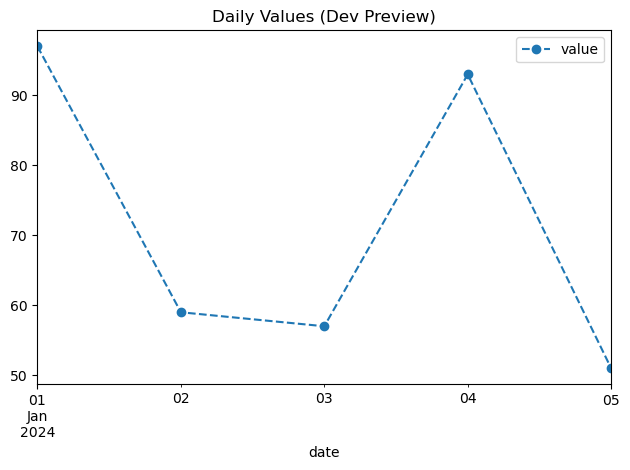


Results: {'status': 'success', 'max_value': 97}
DAG Tasks: ['start', 'process_data', 'end']


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from airflow.models import DAG
from airflow.operators.python import PythonOperator
from airflow.operators.empty import EmptyOperator

# ETL with numpy/pandas
def mock_etl(**kwargs) -> dict[str, str | float]:
    """ETL with numpy data generation."""
    print("Running ETL (numpy/pandas)...")
    
    # Generate data with numpy/pandas
    dates = pd.date_range("2024-01-01", periods=5)
    values = np.random.randint(50, 100, size=5)
    
    # Create and display dataframe
    df = pd.DataFrame({"date": dates, "value": values})
    print("\nSample Data:")
    print(df.to_markdown(tablefmt="psql", index=False))
    
    # Quick plot
    df.plot(x="date", y="value", marker="o", linestyle="--")
    plt.title("Daily Values (Dev Preview)")
    plt.tight_layout()
    plt.show()
    
    return {"status": "success", "max_value": values.max()}

# Basic DAG structure
with DAG(
    dag_id="numpy_etl",
    schedule="@daily",
    start_date=datetime(2024, 1, 1),
    catchup=False,
    default_args={"retries": 1}
) as dag:
    
    start = EmptyOperator(task_id="start")
    process = PythonOperator(
        task_id="process_data",
        python_callable=mock_etl
    )
    end = EmptyOperator(task_id="end")
    
    start >> process >> end

# Dev helper functions
def test_run() -> None:
    """Quick test during development."""
    print("\n=== TEST RUN ===")
    results = mock_etl()
    print(f"\nResults: {results}")
    print(f"DAG Tasks: {[t.task_id for t in dag.tasks]}")

test_run()  # Execute during development